Albrecht Durer: Northern Rennesaince  
Ivan Shishkin: Realism - landscapes  
Pablo Picasso: Surrealism  
John Singer Sargent: Realism - portraits  
Gustave Dore: Romanticism - black and white  
Edgar Degas: Impressionism  
Giovanni Battista Piranesi: Neoclassicism  
Ivan Aivazovsky: Romanticism - waves and seas  
Rembrandt: Baroque   
Claude Monet: Impressionism  
Paul Gauguin: Post-impressionism  
Boris Kustodiev: Realism/Art Noveau  
Raphael Kirchner: Art Noveau - australian  
Pierre-Auguste Renoir: Impressionism  
Vincent van Gogh: Post Impressionism  
Salvador Dali: Surrealism

In [385]:
import pandas as pd
import numpy as np
import sys
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, ImageChops, ImageOps

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint


In [386]:
train_info = pd.read_csv('train_info.csv')
all_data_info = pd.read_csv('all_data_info.csv')

In [411]:
df = all_data_info.loc[all_data_info['artist'].isin(['John Singer Sargent','Edgar Degas',
                                                     'Giovanni Battista Piranesi','Claude Monet',
                                                     'Raphael Kirchner','Salvador Dali'])]


In [412]:
df.artist.unique()

array(['Edgar Degas', 'Claude Monet', 'Giovanni Battista Piranesi',
       'Raphael Kirchner', 'John Singer Sargent', 'Salvador Dali'], dtype=object)

In [413]:
train = df[df['in_train']== True]
final_test = df[df['in_train']== False]

In [414]:
selected_jpgs = list(train.new_filename.values)

In [415]:
originals = "/Users/jenelleverrochi/Desktop/Capstone/train/"
rgb_images = "/Users/jenelleverrochi/Desktop/Capstone/Final/selected_artists_RGB/"
thumbs = "/Users/jenelleverrochi/Desktop/Capstone/Final/selected_artists_thumbs/"
thumbs_128 = "/Users/jenelleverrochi/Desktop/Capstone/Final/selected_artists_128/"
thumbs_256 = "/Users/jenelleverrochi/Desktop/Capstone/Final/selected_artists_256/"

In [416]:
'/Users/jenelleverrochi/Desktop/'

'/Users/jenelleverrochi/Desktop/'

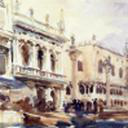

In [13]:
Image.open(thumbs_128+'209.jpg')

In [34]:
for f in selected_jpgs:
    makeThumb((rgb_images+f), (thumbs_256+f))

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2438: DecompressionBombWarning: Image size (669000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


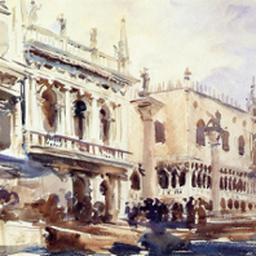

In [35]:
Image.open(thumbs_256+'209.jpg')

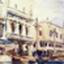

In [36]:
Image.open(thumbs+'209.jpg')

In [2]:
pwd

'/Users/jenelleverrochi/GA/PROJECTS/PaiterbyNumber'

SIFT

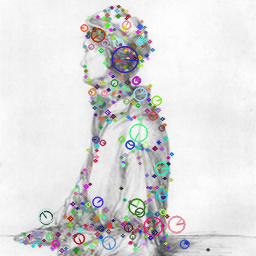

In [417]:
import cv2
import numpy as np

img = cv2.imread('23.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp,gray, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('sift_keypoints.jpg',img)
Image.fromarray(img)

In [209]:
img.shape

(256, 256, 3)

In [188]:
kp,des = sift.compute(gray,kp)

In [190]:
des

array([[  46.,   27.,    4., ...,    2.,    1.,    4.],
       [   1.,    1.,    0., ...,    8.,    1.,    6.],
       [ 106.,   35.,   42., ...,    0.,    1.,    9.],
       ..., 
       [  39.,   71.,   14., ...,    0.,    0.,   14.],
       [   1.,    1.,    0., ...,    1.,    1.,   29.],
       [   0.,    0.,    3., ...,    2.,    3.,    3.]], dtype=float32)

In [395]:
pd.DataFrame(des).describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,13.800000,18.200001,31.000000,39.400002,17.100000,9.800000,17.799999,21.299999,48.500000,17.200001,...,12.300000,24.500000,29.299999,24.900000,7.400000,5.000000,6.000000,4.900000,7.500000,15.60000
std,13.002563,25.922108,41.087982,28.972017,13.690629,14.528134,23.360935,27.186800,50.990742,15.901082,...,17.839096,28.304888,36.055664,33.692894,9.252028,7.378648,11.527744,10.598219,16.413071,34.04311
min,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,6.000000,7.250000,9.000000,20.250000,7.000000,2.000000,3.000000,5.000000,5.500000,7.250000,...,2.250000,2.250000,6.750000,2.750000,0.000000,0.000000,0.250000,0.000000,0.000000,2.25000
50%,11.500000,11.000000,13.500000,31.500000,14.500000,3.500000,9.500000,12.500000,20.000000,12.500000,...,4.000000,19.500000,16.000000,11.000000,4.000000,1.500000,2.000000,0.000000,0.500000,5.00000
75%,17.000000,13.000000,36.000000,57.000000,24.750000,8.000000,21.250000,26.250000,96.500000,24.000000,...,16.000000,29.250000,33.750000,36.750000,12.250000,8.000000,5.500000,1.000000,4.000000,8.50000
max,44.000000,90.000000,136.000000,95.000000,45.000000,44.000000,76.000000,90.000000,132.000000,49.000000,...,56.000000,88.000000,122.000000,109.000000,28.000000,23.000000,38.000000,32.000000,52.000000,112.00000


pull in arrays for all images and reshape

In [418]:
train_array = []
for j in selected_jpgs:
    img = cv2.imread(thumbs+j)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create(10)
    kp = sift.detect(gray,None)
    img=cv2.drawKeypoints(gray,kp,gray, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    kp,des = sift.compute(gray,kp)
    train_array.append(des)
    
#     for i in jpgs:
#         train_array.append(get_array(i))

In [419]:
train_array[0][9]

array([   4.,  102.,   92.,    4.,    0.,    0.,    0.,    0.,    0.,
         20.,  117.,   73.,   18.,    0.,    0.,    0.,    1.,    6.,
         22.,   79.,   67.,   13.,    1.,    0.,   11.,    5.,    5.,
          9.,    7.,   14.,    4.,    4.,   10.,   34.,   43.,   50.,
         14.,    1.,    0.,    3.,    7.,   58.,  117.,  108.,   49.,
          8.,    0.,    1.,   69.,  117.,   80.,   12.,   15.,   25.,
          2.,    4.,   17.,   13.,    3.,    4.,    8.,   28.,    3.,
          3.,    1.,    3.,   94.,   53.,   32.,    9.,    0.,    1.,
         22.,   22.,   54.,   85.,   75.,   52.,    3.,    9.,  117.,
        114.,   53.,   15.,    6.,    9.,    2.,   27.,   15.,   13.,
        110.,   51.,    5.,    5.,    0.,    0.,    0.,    3.,  117.,
         55.,    2.,    0.,    0.,    0.,    4.,   28.,  105.,   54.,
          4.,    1.,    0.,    0.,   14.,  110.,   98.,   14.,    0.,
          0.,    0.,    1.,    6.,   13.,  117.,   44.,    0.,    0.,
          2.,   15.]

In [420]:
#to test and make sure jpgs are pulled in in the right order
for j in selected_jpgs:
    img = cv2.imread(thumbs+'5145.jpg')
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create(10)
    kp = sift.detect(gray,None)
    img=cv2.drawKeypoints(gray,kp,gray, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    kp,des = sift.compute(gray,kp)
    print(des[9])

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
   20.   19.    3.    5.   83.   20.   43.   70.   22.   21.   84.   62.
   10.   18.   16.   25.   74.  106.   89.   17.    5.    4.   15.   44.
   82.   41.   26.   18.   43.    7.   19.   25.  107.   61.    6.   15.
  118.   63.   36.   30.    9.    9.   12.   47.   15.   21.   48.  118.
  118.   42.   12.    7.   52.   35.   10.   38.   48.    7.   11.   31.
   41.    4.    7.   67.   39.    2.   25.   34.   80.    9.   10.   79.
   49.    0.    4.   29.   11.    9.   33.  118.   54.    0.    0.    0.
   52.   40.   15.   23.    3.    0.    0.    0.]
[   6.   12.    9.   95.   45.    5.   10.   30.    2.    2.   15.  110.
   31.    9.   15.   32.    4.   14.   12.   32.   41.   58.   22.    4.
    5.   23.    8.    8.   60.  102.   12.    1.   18.   56.  110.   50.
 

In [421]:
for i in train_array:
    print(i.shape)[0]

(11, 128)


TypeError: 'NoneType' object is not subscriptable

Need to reshape, but all are not the same size

In [ ]:
len(train_array)

In [ ]:
np.histogram([train_array[0]], bins=[0,20,40,60,80,100,120,140,160,180])

In [398]:
print(train_array[3105])

None


In [399]:
def make_hist(x):
    try:
        hist = np.histogram([train_array[x]], bins=[0,20,40,60,80,100,120,140,160,180])
        return hist
    except:
        hist = np.histogram(np.arange(0,1280), bins=[0,20,40,60,80,100,120,140,160,180])
        return hist
        

In [400]:
array = []
for i in np.arange(0,6063):
    array.append(make_hist(i)[0])

In [401]:
sift_df = pd.DataFrame(array)

In [402]:
sift_df

,0,1,2,3,4,5,6,7,8
0,747,215,118,63,36,32,69,0,0
1,833,227,109,77,60,42,56,4,0
2,813,162,108,61,36,39,40,21,0
3,742,204,133,77,34,22,59,9,0
4,704,257,104,67,51,60,37,0,0
5,884,159,69,41,32,17,23,39,16
6,736,217,110,75,40,60,42,0,0
7,823,190,81,55,34,17,46,34,0
8,835,153,82,57,42,38,73,0,0
9,872,214,99,57,40,65,61,0,0


### Pull in labels

In [403]:
jpgs_list = []
for i in selected_jpgs:
    jpgs_list.append(i)
        
        
jpg_df = pd.DataFrame(jpgs_list, columns=['jpg'])
jpg_df.shape

(6063, 1)

In [404]:
sift_df = pd.concat([sift_df, jpg_df], axis=1)
sift_df.head()

,0,1,2,3,4,5,6,7,8,jpg
0,747,215,118,63,36,32,69,0,0,5145.jpg
1,833,227,109,77,60,42,56,4,0,64794.jpg
2,813,162,108,61,36,39,40,21,0,90385.jpg
3,742,204,133,77,34,22,59,9,0,95254.jpg
4,704,257,104,67,51,60,37,0,0,46347.jpg


In [405]:
artist_df = all_data_info[['new_filename', 'artist']]
artist_df.columns = ['jpg', 'artist']

In [406]:
sift_df = pd.merge(sift_df, artist_df, on='jpg', how='left')
sift_df.head()

,0,1,2,3,4,5,6,7,8,jpg,artist
0,747,215,118,63,36,32,69,0,0,5145.jpg,Albrecht Durer
1,833,227,109,77,60,42,56,4,0,64794.jpg,Albrecht Durer
2,813,162,108,61,36,39,40,21,0,90385.jpg,Albrecht Durer
3,742,204,133,77,34,22,59,9,0,95254.jpg,Albrecht Durer
4,704,257,104,67,51,60,37,0,0,46347.jpg,Albrecht Durer


In [408]:
sift_df.groupby(['artist']).mean()

,0,1,2,3,4,5,6,7,8
artist,,,,,,,,,
Albrecht Durer,795.702350,194.028721,102.973890,61.660574,39.723238,35.130548,49.031332,12.519582,2.169713
Boris Kustodiev,825.353093,182.935567,95.840206,57.270619,37.613402,32.409794,50.909794,15.731959,2.662371
Claude Monet,799.073107,183.206266,96.083551,57.681462,38.007833,33.540470,46.537859,14.725849,2.859008
Edgar Degas,819.677003,184.772610,98.180879,59.478036,38.937984,33.307494,52.266150,14.480620,1.775194
Giovanni Battista Piranesi,846.166667,179.825871,92.920398,55.164179,35.368159,31.246269,43.278607,15.246269,5.114428
Gustave Dore,800.860465,202.550388,103.857881,61.428941,39.596899,35.033592,49.258398,11.036176,1.821705
Ivan Aivazovsky,864.582011,139.216931,77.039683,50.195767,34.169312,27.021164,49.134921,19.333333,4.219577
Ivan Shishkin,826.722071,183.888283,96.888283,58.376022,38.138965,33.144414,50.310627,14.711172,2.754768
John Singer Sargent,826.294430,179.941645,95.400531,57.442971,37.623342,32.970822,52.007958,15.122016,2.087533


### Train Test Split

In [375]:
X = sift_df.iloc[:,:-2]
y = sift_df['artist']

In [376]:
y = pd.get_dummies(y)

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [380]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4547, 9)
(1516, 9)
(4547, 16)
(1516, 16)


### Modeling
based on ~10 detected keypoints, I aggregated results and will use these features to predict the artist.

In [383]:
model = Sequential()
model.add(Dense(9, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [384]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=1)

Train on 4547 samples, validate on 1516 samples
Epoch 1/5
4547/4547 [==============================] - 1s 272us/step - loss: 13.5640 - acc: 0.0598 - val_loss: 13.4148 - val_acc: 0.0653
Epoch 2/5
4547/4547 [==============================] - 1s 168us/step - loss: 13.3852 - acc: 0.0647 - val_loss: 13.4122 - val_acc: 0.0673
Epoch 3/5
4547/4547 [==============================] - 1s 157us/step - loss: 13.3536 - acc: 0.0783 - val_loss: 13.3451 - val_acc: 0.0752
Epoch 4/5
4547/4547 [==============================] - 1s 155us/step - loss: 13.3210 - acc: 0.0812 - val_loss: 13.3634 - val_acc: 0.0792
Epoch 5/5
4547/4547 [==============================] - 1s 186us/step - loss: 13.3133 - acc: 0.0781 - val_loss: 13.3368 - val_acc: 0.0699


In [ ]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(4,4), input_shape=(64,64,3), activation='relu'))
model.add(Conv2D(30, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(45, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

In [83]:
len(selected_jpgs)

6063

SURF

In [96]:
Image.open(thumbs_256+'298.jpg').save('/Users/jenelleverrochi/GA/PROJECTS/PaiterbyNumber/298.jpg')

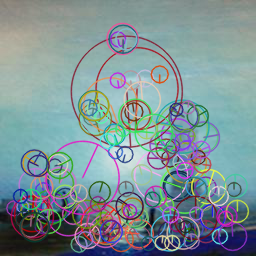

In [105]:
img2 = cv2.imread('298.jpg')
gray= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)


# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 40
surf = cv2.xfeatures2d.SURF_create(40)

# Find keypoints and descriptors directly
kp= surf.detect(img2, None)

img2=cv2.drawKeypoints(img2,kp,img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('surf_keypoints.jpg',img)
Image.fromarray(img2)


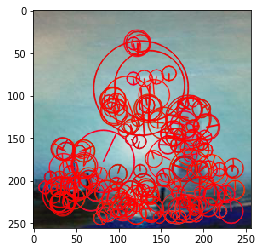

(<matplotlib.image.AxesImage at 0x1a28a04518>, None)

In [106]:
img2 = cv2.drawKeypoints(img2,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()